<a href="https://colab.research.google.com/github/MrigeeshAshwin/RVFL/blob/main/RVFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
class RVFL:
    def __init__(self, n_hidden=50, activation= sigmoid, lam=0.01, direct_link=True):
        self.n_hidden = n_hidden
        self.activation = activation
        self.lam = lam
        self.direct_link = direct_link

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights and biases
        self.W = np.random.randn(self.n_hidden, n_features)
        self.b = np.random.randn(self.n_hidden)

        # Compute hidden layer output
        H = self.activation(X @ self.W.T + self.b)

        if self.direct_link:
            # Concatenate input and hidden layer
            H = np.hstack([X, H])

        if (n_features<n_samples):
          I = np.eye(H.shape[1])  # Identity matrix of size (features,)
          self.beta = np.linalg.inv(H.T @ H + self.lam * I) @ H.T @ y
        else:
          I = np.eye(H.shape[0])  # Identity matrix of size (samples,)
          self.beta = H.T @ np.linalg.inv(H@ H.T + self.lam * I)@ y

    def predict(self, X):
        # Compute hidden layer output
        H = self.activation(X @ self.W.T + self.b)

        if self.direct_link:
            H = np.hstack([X, H])

        # Use learned output weights to make prediction
        return H @ self.beta

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold

# Load Iris dataset
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target
encoder = OneHotEncoder(sparse_output =False)
y_onehot = encoder.fit_transform(y)

# Define number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracies = []

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_onehot[train_index], y_onehot[test_index]

    # Initialize RVFL model
    model = RVFL(n_hidden=100, lam=0.01, direct_link=True)
    model.fit(X_train, y_train)

    # Predict on test fold
    y_pred = model.predict(X_test)

    # Convert one-hot predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy
    acc = np.mean(y_pred_classes == y_true_classes)
    accuracies.append(acc)
    print(f"Fold {fold}: Accuracy = {acc:.4f}")

print("-" * 30)
print(f"Mean CV Accuracy: {np.mean(accuracies):.4f}")
print(f"Std CV Accuracy: {np.std(accuracies):.4f}")


Fold 1: Accuracy = 1.0000
Fold 2: Accuracy = 0.9667
Fold 3: Accuracy = 0.9333
Fold 4: Accuracy = 0.9333
Fold 5: Accuracy = 0.9333
------------------------------
Mean CV Accuracy: 0.9533
Std CV Accuracy: 0.0267


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import KFold

# Assume RVFL class is already defined

# Load data
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

# Preprocess
scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = OneHotEncoder(sparse_output =False)
y_onehot = encoder.fit_transform(y)

# Parameters to test
n_hidden_options = [50, 100, 150]
lam_options = [0.001, 0.01, 0.1]
direct_link_options = [True, False]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

best_acc = 0
best_params = None

for n_hidden in n_hidden_options:
    for lam in lam_options:
        for direct_link in direct_link_options:
            accuracies = []
            for train_idx, test_idx in kf.split(X):
                X_train, X_test = X[train_idx], X[test_idx]
                y_train, y_test = y_onehot[train_idx], y_onehot[test_idx]

                model = RVFL(n_hidden=n_hidden, lam=lam, direct_link=direct_link)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                y_pred_cls = np.argmax(y_pred, axis=1)
                y_true_cls = np.argmax(y_test, axis=1)

                accuracies.append(np.mean(y_pred_cls == y_true_cls))

            mean_acc = np.mean(accuracies)
            print(f"Params: n_hidden={n_hidden}, lam={lam}, direct_link={direct_link} --> Mean CV Accuracy: {mean_acc:.4f}")

            if mean_acc > best_acc:
                best_acc = mean_acc
                best_params = (n_hidden, lam, direct_link)

print("\nBest Parameters:")
print(f"n_hidden={best_params[0]}, lam={best_params[1]}, direct_link={best_params[2]}")
print(f"Best CV Accuracy: {best_acc:.4f}")


Params: n_hidden=50, lam=0.001, direct_link=True --> Mean CV Accuracy: 0.9533
Params: n_hidden=50, lam=0.001, direct_link=False --> Mean CV Accuracy: 0.9467
Params: n_hidden=50, lam=0.01, direct_link=True --> Mean CV Accuracy: 0.9667
Params: n_hidden=50, lam=0.01, direct_link=False --> Mean CV Accuracy: 0.9667
Params: n_hidden=50, lam=0.1, direct_link=True --> Mean CV Accuracy: 0.9733
Params: n_hidden=50, lam=0.1, direct_link=False --> Mean CV Accuracy: 0.9533
Params: n_hidden=100, lam=0.001, direct_link=True --> Mean CV Accuracy: 0.9600
Params: n_hidden=100, lam=0.001, direct_link=False --> Mean CV Accuracy: 0.9533
Params: n_hidden=100, lam=0.01, direct_link=True --> Mean CV Accuracy: 0.9667
Params: n_hidden=100, lam=0.01, direct_link=False --> Mean CV Accuracy: 0.9600
Params: n_hidden=100, lam=0.1, direct_link=True --> Mean CV Accuracy: 0.9667
Params: n_hidden=100, lam=0.1, direct_link=False --> Mean CV Accuracy: 0.9667
Params: n_hidden=150, lam=0.001, direct_link=True --> Mean CV Ac

Test accuracy on Wine dataset: 1.00


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [ ]:
import numpy as np
import pandas as pd

X = X.replace('?', np.nan)
data = pd.concat([X, y], axis=1).dropna()
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output =False), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

# Convert y to binary (e.g., '>50K' → 1, '<=50K' → 0)
y_binary = (y.values.ravel() == '>50K').astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)
rvfl = RVFL(n_hidden=1000, lam=10, direct_link=True)
rvfl.fit(X_train, y_train)
y_pred = rvfl.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Threshold prediction (since it's regression-style output)
y_pred_class = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


Accuracy: 0.8525152017689331
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      7543
           1       0.61      0.31      0.41      1502

    accuracy                           0.85      9045
   macro avg       0.74      0.64      0.66      9045
weighted avg       0.83      0.85      0.83      9045



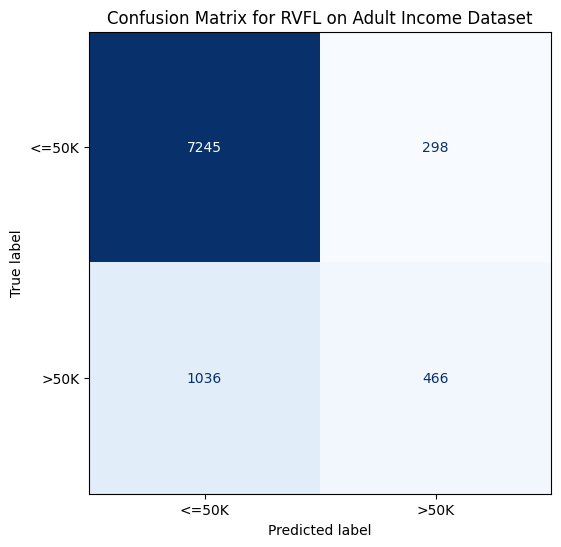

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Confusion Matrix for RVFL on Adult Income Dataset")
plt.show()


In [ ]:
# RVFL Model Comparison Script (Vanilla, SP-RVFL, SW-SP-RVFL) for Regression & Classification

import numpy as np
import networkx as nx
from sklearn.datasets import load_diabetes, fetch_california_housing, load_wine, load_digits, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
import warnings
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import fetch_openml

np.random.seed(42)

# ---------------------- Core Functions ----------------------
def relu(x):
    return np.maximum(0, x)

def generate_small_world_mask(n_features, n_hidden, k=4, p=0.3):
    G = nx.watts_strogatz_graph(n=n_features, k=k, p=p)
    mask = np.zeros((n_features, n_hidden))
    for h in range(n_hidden):
        center = np.random.choice(n_features)
        neighbors = list(G.neighbors(center)) + [center]
        mask[neighbors, h] = 1
    return mask

def sp_rvfl_solver(H, Y, max_iter=100, tol=1e-4):
    N, D = H.shape
    K = Y.shape[1]
    alpha = np.ones(D)
    sigma2 = 1.0
    eps = 1e-6
    for _ in range(max_iter):
        Alpha = np.diag(alpha)
        A = Alpha + (H.T @ H) / sigma2 + eps * np.eye(D)
        try:
            L = np.linalg.cholesky(A)
            Sigma = np.linalg.solve(L.T, np.linalg.solve(L, np.eye(D)))
        except np.linalg.LinAlgError:
            Sigma = np.linalg.inv(A)
        Mu = Sigma @ H.T @ Y / sigma2
        gamma = 1 - alpha * np.diag(Sigma)
        gamma = np.maximum(gamma, 0)
        alpha_new = gamma / (np.sum(Mu**2, axis=1) + 1e-8)
        denom = N * K - np.sum(gamma)
        sigma2_new = np.sum((Y - H @ Mu) ** 2) / (denom if denom > 1e-8 else 1)
        if np.linalg.norm(alpha - alpha_new) < tol and abs(sigma2 - sigma2_new) < tol * sigma2:
            break
        alpha, sigma2 = alpha_new, sigma2_new
    return Mu

def preprocess_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    encoder = OneHotEncoder(sparse_output=False)
    y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_onehot = encoder.transform(y_test.reshape(-1, 1))
    return X_train, X_test, y_train_onehot, y_test_onehot, encoder

def preprocess_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)
    return X_train, X_test, y_train, y_test, scaler_y

# ---------------------- RVFL Models ----------------------
def base_rvfl(X_train, y_train, X_test, n_hidden=256, W=None, b=None, use_sp=False, mask=None, mask_direct=None):
    if W is None:
        W = np.random.randn(X_train.shape[1], n_hidden)
        if mask is not None:
            W *= mask
    if b is None:
        b = np.random.randn(n_hidden)
    H_train = relu(X_train @ W + b)
    H_test = relu(X_test @ W + b)

    X_train_proj = X_train @ mask_direct if mask_direct is not None else X_train
    X_test_proj = X_test @ mask_direct if mask_direct is not None else X_test

    Z_train = np.hstack([X_train_proj, H_train])
    Z_test = np.hstack([X_test_proj, H_test])

    if use_sp:
        beta = sp_rvfl_solver(Z_train, y_train)
    else:
        beta = np.linalg.inv(Z_train.T @ Z_train + 1e-3 * np.eye(Z_train.shape[1])) @ Z_train.T @ y_train
    return Z_test @ beta

def vanilla_rvfl(X_train, y_train, X_test, n_hidden=256):
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=False)

def sp_rvfl(X_train, y_train, X_test, n_hidden=256):
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True)

def sw_sp_rvfl(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3):
    mask = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask)

def sp_rvfl_sw_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3):
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask_direct=mask_direct)

def sw_direct_only(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3):
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=False, mask_direct=mask_direct)

def sw_hidden_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3):
    mask_hidden = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=False, mask=mask_hidden, mask_direct=mask_direct)

def sw_sp_hidden_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3):
    mask_hidden = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask_hidden, mask_direct=mask_direct)

# ---------------------- Evaluation ----------------------
def evaluate_models(X, y, dataset_name, task='regression'):
    if task == 'classification':
        X_train, X_test, y_train, y_test, encoder = preprocess_classification(X, y)
        y_true_labels = np.argmax(y_test, axis=1)
    else:
        X_train, X_test, y_train, y_test, scaler_y = preprocess_regression(X, y)
        y_true_continuous = scaler_y.inverse_transform(y_test)

    models = {
        "Vanilla RVFL": vanilla_rvfl,
        "SP-RVFL": sp_rvfl,
        "SW-SP-RVFL": sw_sp_rvfl,
        "SP-RVFL + SW Direct": sp_rvfl_sw_direct,
        "SW Direct Only": sw_direct_only,
        "SW Hidden + Direct": sw_hidden_direct,
        "SW-SP Hidden + Direct": sw_sp_hidden_direct
    }

    results = {}
    for name, model in models.items():
        y_pred = model(X_train, y_train, X_test)
        if task == 'classification':
            y_pred_labels = np.argmax(y_pred, axis=1)
            acc = accuracy_score(y_true_labels, y_pred_labels)
            results[name] = round(acc * 100, 2)
        else:
            y_pred_continuous = scaler_y.inverse_transform(y_pred)
            rmse = np.sqrt(mean_squared_error(y_true_continuous, y_pred_continuous))
            results[name] = round(rmse, 4)

    print(f"\nDataset: {dataset_name}")
    for model, score in results.items():
        print(f"{model} {'Accuracy (%)' if task=='classification' else 'RMSE'}: {score}")

    return {"Dataset": dataset_name, **results}

# ---------------------- Main Execution ----------------------
results = []


X, y = load_diabetes(return_X_y=True)
y = y.reshape(-1, 1)
results.append(evaluate_models(X, y, "Diabetes", task='regression'))

# Regression Dataset: California Housing
try:
    X, y = fetch_california_housing(return_X_y=True)
    y = y.reshape(-1, 1)
    results.append(evaluate_models(X, y, "California Housing", task='regression'))
except:
    print("Could not load California Housing dataset.")

# Energy Efficiency (target: Heating Load)
energy = fetch_ucirepo(id=242)
X = energy.data.features.values
y = energy.data.targets["Y1"].values.reshape(-1, 1)
results.append(evaluate_models(X, y, "Energy Efficiency (Heating)", task='regression'))


# Classification Dataset: Wine
try:
    data = load_wine()
    X, y = data.data, data.target
    results.append(evaluate_models(X, y, "Wine", task='classification'))
except:
    print("Could not load Wine dataset.")

# Uncomment below if needed:

# Classification Dataset: breast cancer
try:
    breast = fetch_openml(name='yeast', version=4, as_frame=True)
    X = breast.data.select_dtypes(include=[np.number]).values
    y = LabelEncoder().fit_transform(breast.target.values)
except:
    print("Could not load Yeast dataset.")

# Classification Dataset: Image Segmentation
try:
    image_seg = fetch_ucirepo(id=110)
    X = image_seg.data.features.values
    y = image_seg.data.targets.iloc[:, 0].values
    y = LabelEncoder().fit_transform(y)
    results.append(evaluate_models(X, y, "Image Segmentation", task='classification'))
except:
    print("Could not load Image Segmentation dataset.")

try:
    X, y = load_digits(return_X_y=True)
    results.append(evaluate_models(X, y, "Digits", task='classification'))
except:
    print("Could not load Image Segmentation dataset.")

# Summary
df = pd.DataFrame(results)
print("\nSummary of Results:")
print(df.to_string(index=False))




Dataset: Diabetes
Vanilla RVFL RMSE: 96.9832
SP-RVFL RMSE: 53.0967
SW-SP-RVFL RMSE: 51.8316
SP-RVFL + SW Direct RMSE: 53.592
SW Direct Only RMSE: 105.6123
SW Hidden + Direct RMSE: 109.5065
SW-SP Hidden + Direct RMSE: 57.5512

Dataset: California Housing
Vanilla RVFL RMSE: 0.6013
SP-RVFL RMSE: 0.6107
SW-SP-RVFL RMSE: 0.5936
SP-RVFL + SW Direct RMSE: 0.6024
SW Direct Only RMSE: 0.607
SW Hidden + Direct RMSE: 0.591
SW-SP Hidden + Direct RMSE: 0.5995

Dataset: Energy Efficiency (Heating)
Vanilla RVFL RMSE: 1.2589
SP-RVFL RMSE: 1.1056
SW-SP-RVFL RMSE: 0.5811
SP-RVFL + SW Direct RMSE: 1.4306
SW Direct Only RMSE: 1.2027
SW Hidden + Direct RMSE: 0.5915
SW-SP Hidden + Direct RMSE: 0.5906

Dataset: Wine
Vanilla RVFL Accuracy (%): 97.22
SP-RVFL Accuracy (%): 100.0
SW-SP-RVFL Accuracy (%): 100.0
SP-RVFL + SW Direct Accuracy (%): 91.67
SW Direct Only Accuracy (%): 100.0
SW Hidden + Direct Accuracy (%): 97.22
SW-SP Hidden + Direct Accuracy (%): 94.44
Could not load Yeast dataset.

Dataset: Image Se

In [ ]:
!pip install ucimlrepo

# Probable architecture


In [ ]:
# RVFL Model Comparison Script (Vanilla, SP-RVFL, SW-SP-RVFL) with Task-Aware Activation

import numpy as np
import networkx as nx
from sklearn.datasets import load_diabetes, fetch_california_housing, load_wine, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import fetch_openml

np.random.seed(42)

# ---------------------- Core Functions ----------------------

def activation(x, task):
    return 1 / (1 + np.exp(-x)) if task == 'classification' else np.maximum(0, x)

def generate_small_world_mask(n_features, n_hidden, k=4, p=0.3):
    G = nx.watts_strogatz_graph(n=n_features, k=k, p=p)
    mask = np.zeros((n_features, n_hidden))
    for h in range(n_hidden):
        center = np.random.choice(n_features)
        neighbors = list(G.neighbors(center)) + [center]
        mask[neighbors, h] = 1
    return mask

def sp_rvfl_solver(H, Y, max_iter=100, tol=1e-4):
    N, D = H.shape
    K = Y.shape[1]
    alpha = np.ones(D)
    sigma2 = 1.0
    eps = 1e-6
    for _ in range(max_iter):
        Alpha = np.diag(alpha)
        A = Alpha + (H.T @ H) / sigma2 + eps * np.eye(D)
        try:
            L = np.linalg.cholesky(A)
            Sigma = np.linalg.solve(L.T, np.linalg.solve(L, np.eye(D)))
        except np.linalg.LinAlgError:
            Sigma = np.linalg.inv(A)
        Mu = Sigma @ H.T @ Y / sigma2
        gamma = 1 - alpha * np.diag(Sigma)
        gamma = np.maximum(gamma, 0)
        alpha_new = gamma / (np.sum(Mu**2, axis=1) + 1e-8)
        denom = N * K - np.sum(gamma)
        sigma2_new = np.sum((Y - H @ Mu) ** 2) / (denom if denom > 1e-8 else 1)
        if np.linalg.norm(alpha - alpha_new) < tol and abs(sigma2 - sigma2_new) < tol * sigma2:
            break
        alpha, sigma2 = alpha_new, sigma2_new
    return Mu

def preprocess_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    encoder = OneHotEncoder(sparse_output=False)
    y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_onehot = encoder.transform(y_test.reshape(-1, 1))
    return X_train, X_test, y_train_onehot, y_test_onehot, encoder

def preprocess_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)
    y_train = scaler_y.fit_transform(y_train)
    y_test = scaler_y.transform(y_test)
    return X_train, X_test, y_train, y_test, scaler_y

# ---------------------- RVFL Models ----------------------

def base_rvfl(X_train, y_train, X_test, n_hidden=256, W=None, b=None,
              use_sp=False, mask=None, mask_direct=None, task='regression'):
    if W is None:
        W = np.random.randn(X_train.shape[1], n_hidden)
        if mask is not None:
            W *= mask
    if b is None:
        b = np.random.randn(n_hidden)

    H_train = activation(X_train @ W + b, task)
    H_test = activation(X_test @ W + b, task)

    X_train_proj = X_train @ mask_direct if mask_direct is not None else X_train
    X_test_proj = X_test @ mask_direct if mask_direct is not None else X_test

    Z_train = np.hstack([X_train_proj, H_train])
    Z_test = np.hstack([X_test_proj, H_test])

    if use_sp:
        beta = sp_rvfl_solver(Z_train, y_train)
    else:
        beta = np.linalg.inv(Z_train.T @ Z_train + 1e-3 * np.eye(Z_train.shape[1])) @ Z_train.T @ y_train

    return Z_test @ beta

def vanilla_rvfl(X_train, y_train, X_test, n_hidden=256, task='regression'):
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=False, task=task)

def sp_rvfl(X_train, y_train, X_test, n_hidden=256, task='regression'):
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, task=task)

def sw_sp_rvfl(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, task='regression'):
    mask = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask, task=task)

def sp_rvfl_sw_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, task='regression'):
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask_direct=mask_direct, task=task)

def sw_direct_only(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, task='regression'):
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=False, mask_direct=mask_direct, task=task)

def sw_hidden_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, task='regression'):
    mask_hidden = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=False, mask=mask_hidden, mask_direct=mask_direct, task=task)

def sw_sp_hidden_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, task='regression'):
    mask_hidden = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask_hidden, mask_direct=mask_direct, task=task)

# ---------------------- Evaluation ----------------------

def evaluate_models(X, y, dataset_name, task='regression'):
    if task == 'classification':
        X_train, X_test, y_train, y_test, encoder = preprocess_classification(X, y)
        y_true_labels = np.argmax(y_test, axis=1)
    else:
        X_train, X_test, y_train, y_test, scaler_y = preprocess_regression(X, y)
        y_true_continuous = scaler_y.inverse_transform(y_test)

    models = {
        "Vanilla RVFL": vanilla_rvfl,
        "SP-RVFL": sp_rvfl,
        "SW-SP-RVFL": sw_sp_rvfl,
        "SP-RVFL + SW Direct": sp_rvfl_sw_direct,
        "SW Direct Only": sw_direct_only,
        "SW Hidden + Direct": sw_hidden_direct,
        "SW-SP Hidden + Direct": sw_sp_hidden_direct
    }

    results = {}
    for name, model in models.items():
        y_pred = model(X_train, y_train, X_test, task=task)
        if task == 'classification':
            y_pred_labels = np.argmax(y_pred, axis=1)
            acc = accuracy_score(y_true_labels, y_pred_labels)
            results[name] = round(acc * 100, 2)
        else:
            y_pred_continuous = scaler_y.inverse_transform(y_pred)
            rmse = np.sqrt(mean_squared_error(y_true_continuous, y_pred_continuous))
            results[name] = round(rmse, 4)

    print(f"\nDataset: {dataset_name}")
    for model, score in results.items():
        print(f"{model} {'Accuracy (%)' if task=='classification' else 'RMSE'}: {score}")

    return {"Dataset": dataset_name, **results}

# ---------------------- Main Execution ----------------------

results = []

X, y = load_diabetes(return_X_y=True)
y = y.reshape(-1, 1)
results.append(evaluate_models(X, y, "Diabetes", task='regression'))

try:
    X, y = fetch_california_housing(return_X_y=True)
    y = y.reshape(-1, 1)
    results.append(evaluate_models(X, y, "California Housing", task='regression'))
except:
    print("Could not load California Housing dataset.")

energy = fetch_ucirepo(id=242)
X = energy.data.features.values
y = energy.data.targets["Y1"].values.reshape(-1, 1)
results.append(evaluate_models(X, y, "Energy Efficiency (Heating)", task='regression'))

try:
    data = load_wine()
    X, y = data.data, data.target
    results.append(evaluate_models(X, y, "Wine", task='classification'))
except:
    print("Could not load Wine dataset.")

try:
    image_seg = fetch_ucirepo(id=110)
    X = image_seg.data.features.values
    y = image_seg.data.targets.iloc[:, 0].values
    y = LabelEncoder().fit_transform(y)
    results.append(evaluate_models(X, y, "Image Segmentation", task='classification'))
except:
    print("Could not load Image Segmentation dataset.")

try:
    X, y = load_digits(return_X_y=True)
    results.append(evaluate_models(X, y, "Digits", task='classification'))
except:
    print("Could not load Digits dataset.")

# Summary
df = pd.DataFrame(results)
print("\nSummary of Results:")
print(df.to_string(index=False))



Dataset: Diabetes
Vanilla RVFL RMSE: 96.9832
SP-RVFL RMSE: 53.0967
SW-SP-RVFL RMSE: 51.8553
SP-RVFL + SW Direct RMSE: 53.1025
SW Direct Only RMSE: 104.0072
SW Hidden + Direct RMSE: 113.5884
SW-SP Hidden + Direct RMSE: 55.5202

Dataset: California Housing
Vanilla RVFL RMSE: 0.6013
SP-RVFL RMSE: 0.6107
SW-SP-RVFL RMSE: 0.588
SP-RVFL + SW Direct RMSE: 0.6023
SW Direct Only RMSE: 0.6067
SW Hidden + Direct RMSE: 0.6035
SW-SP Hidden + Direct RMSE: 0.5934

Dataset: Energy Efficiency (Heating)
Vanilla RVFL RMSE: 1.2589
SP-RVFL RMSE: 1.1056
SW-SP-RVFL RMSE: 0.5476
SP-RVFL + SW Direct RMSE: 1.6335
SW Direct Only RMSE: 1.1521
SW Hidden + Direct RMSE: 0.554
SW-SP Hidden + Direct RMSE: 0.5

Dataset: Wine
Vanilla RVFL Accuracy (%): 100.0
SP-RVFL Accuracy (%): 97.22
SW-SP-RVFL Accuracy (%): 100.0
SP-RVFL + SW Direct Accuracy (%): 100.0
SW Direct Only Accuracy (%): 100.0
SW Hidden + Direct Accuracy (%): 97.22
SW-SP Hidden + Direct Accuracy (%): 97.22

Dataset: Image Segmentation
Vanilla RVFL Accuracy

In [ ]:
pip install scikit-learn numpy pandas networkx imbalanced-learn ucimlrepo openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 48.2 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=bc38d5d1577832dfd39bc4e727695b508cfd47535a8f634b4168a3175759b713
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
# RVFL Pipeline with Iterative Bayesian Mask Refinement and Two-Stage Hyperparameter Tuning (Multi-Model)

import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import pandas as pd
from sklearn.datasets import load_digits, load_diabetes, load_wine, fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sns.set(style="whitegrid")

# --- Activation ---
def activation(x, task):
    return 1 / (1 + np.exp(-x)) if task == 'classification' else np.maximum(0, x)

# --- Graph Mask Generator ---
def generate_small_world_mask(n_features, n_hidden, k=4, p=0.3):
    G = nx.watts_strogatz_graph(n=n_features, k=k, p=p)
    mask = np.zeros((n_features, n_hidden))
    for h in range(n_hidden):
        center = np.random.choice(n_features)
        neighbors = list(G.neighbors(center)) + [center]
        mask[neighbors, h] = 1
    return mask

# --- Bayesian Solver ---
def sp_rvfl_solver_iterative(H, Y, max_iter=30, tol=1e-4, pruning_threshold=1e4, outer_iters=1):
    N, D = H.shape
    K = Y.shape[1]
    mask = np.ones(D)
    for outer in range(outer_iters):
        alpha = np.ones(D)
        sigma2 = 1.0
        eps = 1e-6
        for _ in range(max_iter):
            Alpha = np.diag(alpha)
            A = Alpha + (H.T @ H) / sigma2 + eps * np.eye(D)
            try:
                L = np.linalg.cholesky(A)
                Sigma = np.linalg.solve(L.T, np.linalg.solve(L, np.eye(D)))
            except np.linalg.LinAlgError:
                Sigma = np.linalg.inv(A)
            Mu = Sigma @ H.T @ Y / sigma2
            gamma = 1 - alpha * np.diag(Sigma)
            gamma = np.maximum(gamma, 0)
            alpha_new = gamma / (np.sum(Mu**2, axis=1) + 1e-8)
            denom = N * K - np.sum(gamma)
            sigma2_new = np.sum((Y - H @ Mu) ** 2) / (denom if denom > 1e-8 else 1)
            if np.linalg.norm(alpha - alpha_new) < tol and abs(sigma2 - sigma2_new) < tol * sigma2:
                break
            alpha, sigma2 = alpha_new, sigma2_new
        mask = (alpha < pruning_threshold).astype(float)
        H = H * mask
    return Mu, mask

# --- Preprocessing ---
def preprocess_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    encoder = OneHotEncoder(sparse_output=False)
    y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_onehot = encoder.transform(y_test.reshape(-1, 1))
    return X_train, X_test, y_train_onehot, y_test_onehot, encoder, y_train, y_test

def preprocess_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)
    y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test = scaler_y.transform(y_test.reshape(-1, 1))
    return X_train, X_test, y_train, y_test, scaler_y, y_train, y_test

# --- Core RVFL ---
def base_rvfl(X_train, y_train, X_test, n_hidden=256, W=None, b=None,
              use_sp=False, mask=None, mask_direct=None, C=1e-3, task='classification'):
    if W is None:
        W = np.random.randn(X_train.shape[1], n_hidden)
        if mask is not None:
            W *= mask
    if b is None:
        b = np.random.randn(n_hidden)

    H_train = activation(X_train @ W + b, task)
    H_test = activation(X_test @ W + b, task)

    X_train_proj = X_train @ mask_direct if mask_direct is not None else X_train
    X_test_proj = X_test @ mask_direct if mask_direct is not None else X_test

    Z_train = np.hstack([X_train_proj, H_train])
    Z_test = np.hstack([X_test_proj, H_test])

    if use_sp:
        beta, learned_mask = sp_rvfl_solver_iterative(Z_train, y_train)
        Z_test = Z_test * learned_mask
    else:
        beta = np.linalg.inv(Z_train.T @ Z_train + C * np.eye(Z_train.shape[1])) @ Z_train.T @ y_train

    return Z_test @ beta

# --- Specialized RVFL Variants ---
def vanilla_rvfl(X_train, y_train, X_test, n_hidden=256, C=1e-3, task='classification'):
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, C=C, task=task)

def sp_rvfl(X_train, y_train, X_test, n_hidden=256, C=1e-3, task='classification'):
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, C=C, task=task)

def sw_sp_rvfl(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, C=1e-3, task='classification'):
    mask = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask, C=C, task=task)

def sw_sp_hidden_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, C=1e-3, task='classification'):
    mask_hidden = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    mask_direct = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask_hidden, mask_direct=mask_direct, C=C, task=task)

# --- Grid Search and Evaluation ---
def hyperparameter_grid_search(X, y, dataset_name, task='classification'):
    models = {
        'Vanilla RVFL': vanilla_rvfl,
        'SP-RVFL': sp_rvfl,
        'SW-SP-RVFL': sw_sp_rvfl,
        'SW-SP Hidden + Direct': sw_sp_hidden_direct
    }

    neuron_options = [10, 50, 100, 256, 512]
    C_options = [1e-2, 1e-1, 1.0, 10.0]

    if task == 'classification':
        X_train_full, X_test, y_train_full, y_test, encoder, y_train_raw, y_test_raw = preprocess_classification(X, y)
        y_val_true = np.argmax(y_test, axis=1)
    else:
        X_train_full, X_test, y_train_full, y_test, scaler_y, y_train_raw, y_test_raw = preprocess_regression(X, y)
        y_val_true = scaler_y.inverse_transform(y_test)

    for model_name, model_fn in models.items():
        best_score = 0 if task == 'classification' else float('inf')
        best_params = {}

        for N in neuron_options:
            for C in C_options:
                try:
                    y_val_pred = model_fn(X_train_full, y_train_full, X_test, n_hidden=N, C=C, task=task)
                    if task == 'classification':
                        acc = accuracy_score(y_val_true, np.argmax(y_val_pred, axis=1))
                        if acc > best_score:
                            best_score = acc
                            best_params = {'N': N, 'C': C}
                    else:
                        val_pred_cont = scaler_y.inverse_transform(y_val_pred)
                        rmse = np.sqrt(mean_squared_error(y_val_true, val_pred_cont))
                        if rmse < best_score:
                            best_score = rmse
                            best_params = {'N': N, 'C': C}
                except Exception as e:
                    print(f"{model_name} failed for N={N}, C={C}: {e}")

        print(f"\nBest Hyperparameters for {model_name} on {dataset_name}:")
        print(best_params)

        final_pred = model_fn(X_train_full, y_train_full, X_test, n_hidden=best_params['N'], C=best_params['C'], task=task)
        if task == 'classification':
            final_score = accuracy_score(y_val_true, np.argmax(final_pred, axis=1))
            print(f"Test Accuracy: {final_score:.4f}")
            cm = confusion_matrix(y_val_true, np.argmax(final_pred, axis=1))
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f"Confusion Matrix - {model_name} ({dataset_name})")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.tight_layout()
            plt.show()
        else:
            test_pred_cont = scaler_y.inverse_transform(final_pred)
            final_score = np.sqrt(mean_squared_error(y_val_true, test_pred_cont))
            print(f"Test RMSE: {final_score:.4f}")

# --- Pipeline Execution ---
if __name__ == '__main__':
    X, y = fetch_california_housing(return_X_y=True)
    hyperparameter_grid_search(X, y, dataset_name="California Housing", task='regression')



Best Hyperparameters for Vanilla RVFL on California Housing:
{'N': 512, 'C': 0.1}
Test RMSE: 0.5903

Best Hyperparameters for SP-RVFL on California Housing:
{'N': 512, 'C': 10.0}
Test RMSE: 0.5811

Best Hyperparameters for SW-SP-RVFL on California Housing:
{'N': 256, 'C': 0.01}
Test RMSE: 0.5945

Best Hyperparameters for SW-SP Hidden + Direct on California Housing:
{'N': 512, 'C': 0.01}
Test RMSE: 0.5846


In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

# metadata
print(iris.metadata)

# variable information
print(iris.variables)


--- Wine (Classification) ---
--- Running Hyperparameter Grid Search for Wine (classification) ---

Evaluating Vanilla RVFL...
  N=10, C=0.01: Score = 1.0000
  N=10, C=1.0: Score = 1.0000
  N=50, C=0.01: Score = 0.9722
  N=50, C=1.0: Score = 1.0000

Best Hyperparameters for Vanilla RVFL on Wine:
{'N': 10, 'C': 0.01}
Test Accuracy for Vanilla RVFL: 1.0000


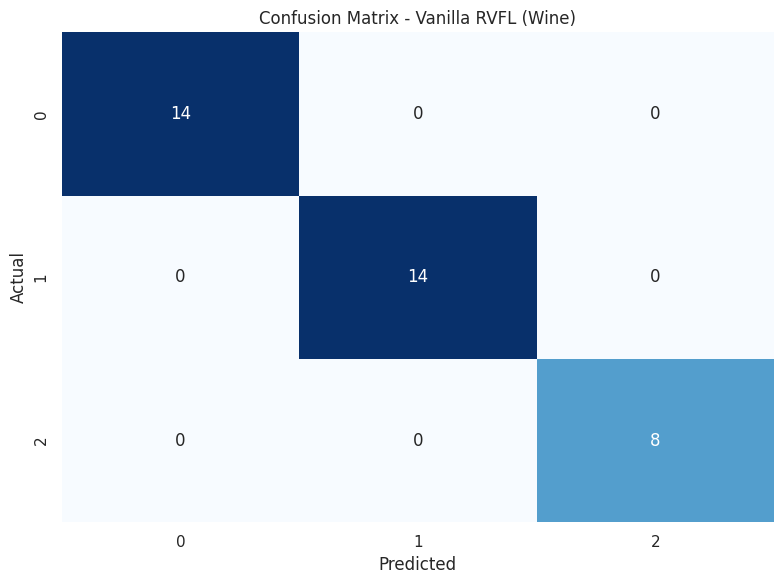


Evaluating SW-SP-RVFL...
  N=10, C=0.01: Score = 1.0000
  N=10, C=1.0: Score = 1.0000
  N=50, C=0.01: Score = 1.0000
  N=50, C=1.0: Score = 0.9722

Best Hyperparameters for SW-SP-RVFL on Wine:
{'N': 10, 'C': 0.01}
Test Accuracy for SW-SP-RVFL: 1.0000


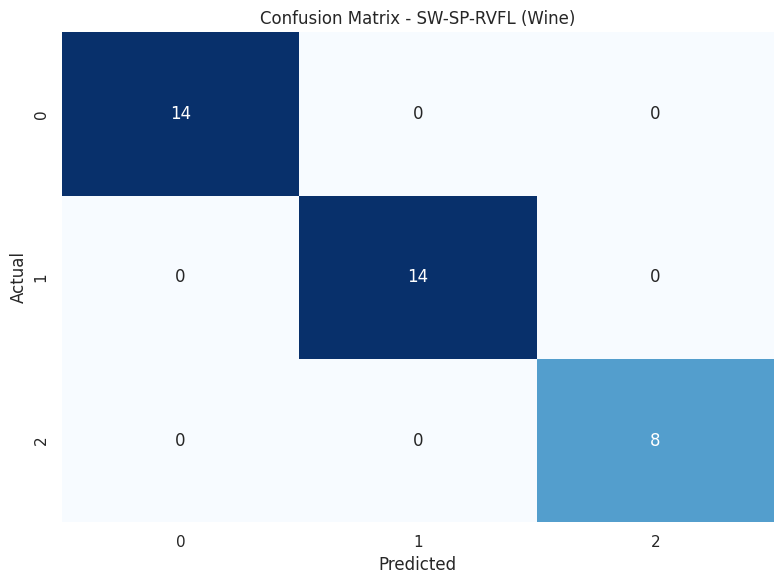


Evaluating SW-SP Hidden + Direct...
  N=10, C=0.01: Score = 1.0000
  N=10, C=1.0: Score = 1.0000
  N=50, C=0.01: Score = 0.9444
  N=50, C=1.0: Score = 0.9444

Best Hyperparameters for SW-SP Hidden + Direct on Wine:
{'N': 10, 'C': 0.01}
Test Accuracy for SW-SP Hidden + Direct: 0.9722


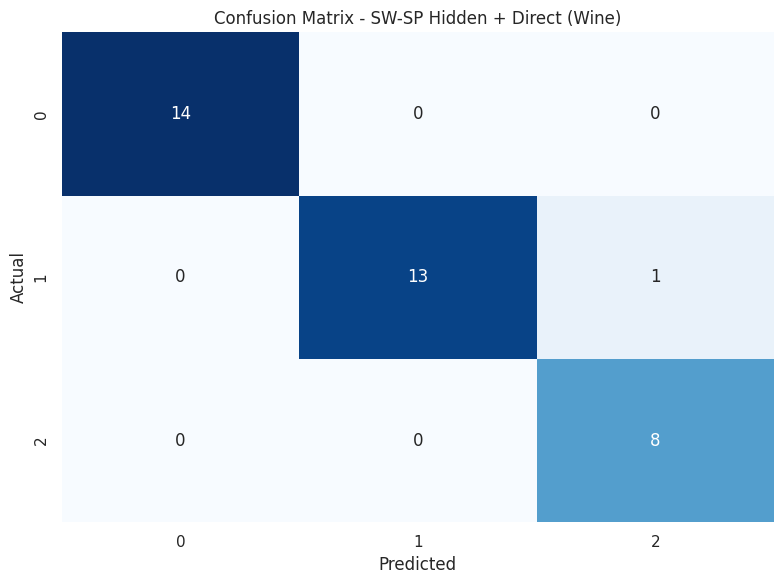


--- Fashion MNIST (Classification) ---
--- Running Hyperparameter Grid Search for Fashion MNIST (classification) ---

Evaluating Vanilla RVFL...


/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: overflow encountered in exp
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))


  N=10, C=0.01: Score = 0.8205


/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: overflow encountered in exp
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))
/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: invalid value encountered in divide
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))


  N=10, C=1.0: Score = 0.8217


/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: overflow encountered in exp
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))
/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: invalid value encountered in divide
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))


  N=50, C=0.01: Score = 0.8255


/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: overflow encountered in exp
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))
/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: invalid value encountered in divide
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))


  N=50, C=1.0: Score = 0.8230

Best Hyperparameters for Vanilla RVFL on Fashion MNIST:
{'N': 50, 'C': 0.01}


/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: overflow encountered in exp
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))
/tmp/ipython-input-2-3923119970.py:18: RuntimeWarning: invalid value encountered in divide
  return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))


Test Accuracy for Vanilla RVFL: 0.8247


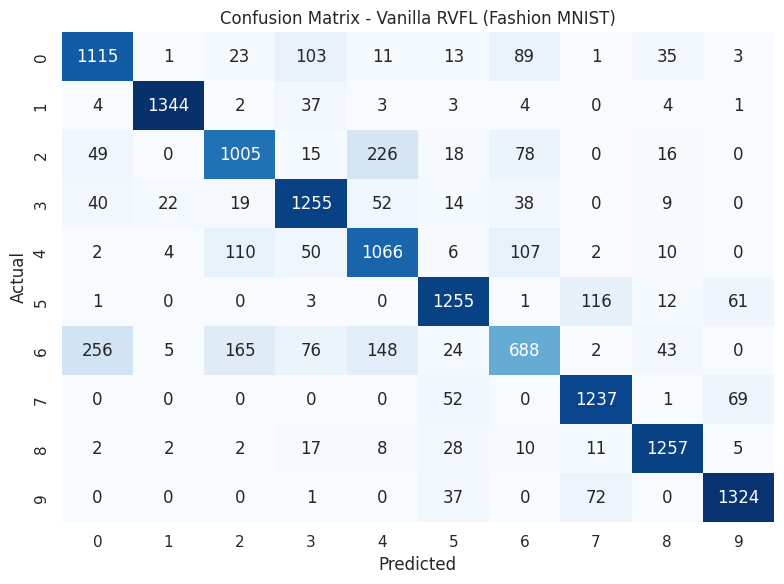


Evaluating SW-SP-RVFL...
  N=10, C=0.01: Score = 0.8207
  N=10, C=1.0: Score = 0.8194
  N=50, C=0.01: Score = 0.8264
  N=50, C=1.0: Score = 0.8264

Best Hyperparameters for SW-SP-RVFL on Fashion MNIST:
{'N': 50, 'C': 0.01}
Test Accuracy for SW-SP-RVFL: 0.8281


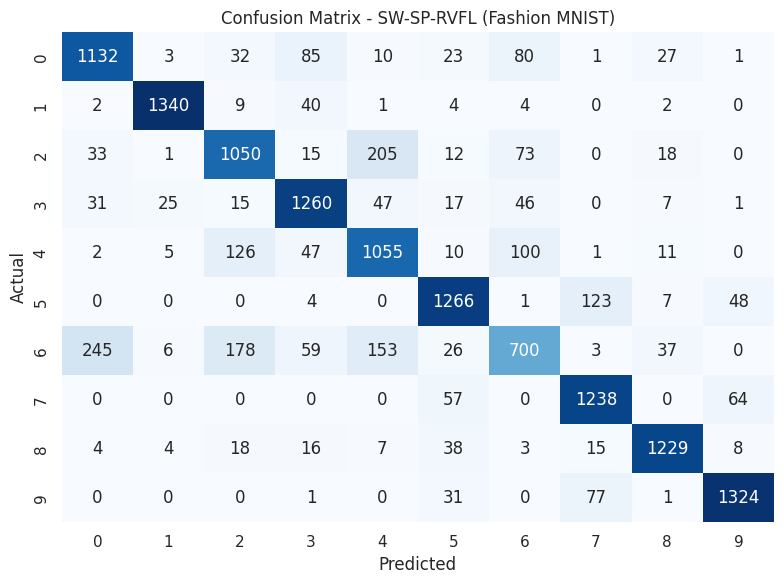


Evaluating SW-SP Hidden + Direct...
  N=10, C=0.01: Score = 0.7756
  N=10, C=1.0: Score = 0.7458
  N=50, C=0.01: Score = 0.7896
  N=50, C=1.0: Score = 0.8054

Best Hyperparameters for SW-SP Hidden + Direct on Fashion MNIST:
{'N': 50, 'C': 1.0}
Test Accuracy for SW-SP Hidden + Direct: 0.8020


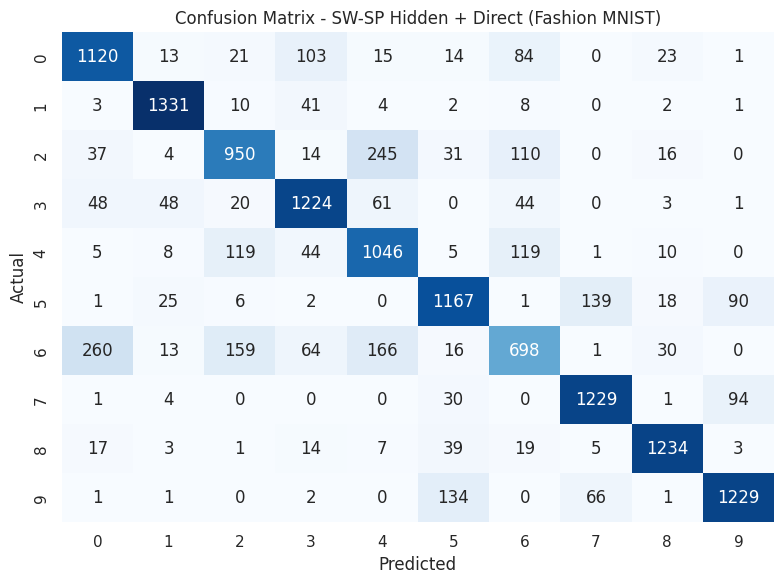


--- K-MNIST (Classification) ---

K-MNIST files not found. Skipping K-MNIST. Please download them (e.g., from https://github.com/rois-codh/kmnist) or ensure they are in the correct path.


In [2]:

import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import pandas as pd
from sklearn.datasets import load_digits, load_diabetes, load_wine, fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
sns.set(style="whitegrid")

# --- Activation ---
def activation(x, task):
    if task == 'classification':
        # Numerically stable sigmoid
        return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (np.exp(x) + 1))
    else: # regression
        return np.maximum(0, x) # ReLU

# --- Graph Mask Generator ---
def generate_small_world_mask(n_features, n_hidden, k=4, p=0.3):
    G = nx.watts_strogatz_graph(n=n_features, k=k, p=p)
    mask = np.zeros((n_features, n_hidden))
    for h in range(n_hidden):
        center = np.random.choice(n_features)
        neighbors = list(G.neighbors(center)) + [center]
        mask[neighbors, h] = 1
    return mask

# --- Bayesian Solver ---
def sp_rvfl_solver_iterative(H, Y, max_iter=30, tol=1e-4, pruning_threshold=1e4, outer_iters=1):
    N, D = H.shape
    K = Y.shape[1]
    mask = np.ones(D)
    for outer in range(outer_iters):
        alpha = np.ones(D)
        sigma2 = 1.0
        eps = 1e-6
        for _ in range(max_iter):
            Alpha = np.diag(alpha)
            A = Alpha + (H.T @ H) / sigma2 + eps * np.eye(D)
            try:
                L = np.linalg.cholesky(A)
                Sigma = np.linalg.solve(L.T, np.linalg.solve(L, np.eye(D)))
            except np.linalg.LinAlgError:
                Sigma = np.linalg.inv(A)
            Mu = Sigma @ H.T @ Y / sigma2
            gamma = 1 - alpha * np.diag(Sigma)
            gamma = np.maximum(gamma, 0)
            alpha_new = gamma / (np.sum(Mu**2, axis=1) + 1e-8)
            denom = N * K - np.sum(gamma)
            sigma2_new = np.sum((Y - H @ Mu) ** 2) / (denom if denom > 1e-8 else 1)
            if np.linalg.norm(alpha - alpha_new) < tol and abs(sigma2 - sigma2_new) < tol * sigma2:
                break
            alpha, sigma2 = alpha_new, sigma2_new
        mask = (alpha < pruning_threshold).astype(float)
        H = H * mask
    return Mu, mask

# --- Preprocessing ---
def preprocess_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    encoder = OneHotEncoder(sparse_output=False)
    y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test_onehot = encoder.transform(y_test.reshape(-1, 1))
    return X_train, X_test, y_train_onehot, y_test_onehot, encoder, y_train, y_test

def preprocess_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)
    X_test = scaler_X.transform(X_test)
    y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
    y_test = scaler_y.transform(y_test.reshape(-1, 1))
    return X_train, X_test, y_train, y_test, scaler_y, y_train, y_test

# --- Core RVFL ---
def base_rvfl(X_train, y_train, X_test, n_hidden=256, W=None, b=None,
              use_sp=False, mask=None, mask_direct=None, C=1e-3, task='classification'):
    if W is None:
        W = np.random.randn(X_train.shape[1], n_hidden)
        if mask is not None:
            W *= mask
    if b is None:
        b = np.random.randn(n_hidden)

    H_train = activation(X_train @ W + b, task)
    H_test = activation(X_test @ W + b, task)

    X_train_proj = X_train @ mask_direct if mask_direct is not None else X_train
    X_test_proj = X_test @ mask_direct if mask_direct is not None else X_test

    Z_train = np.hstack([X_train_proj, H_train])
    Z_test = np.hstack([X_test_proj, H_test])

    if use_sp:
        beta, learned_mask = sp_rvfl_solver_iterative(Z_train, y_train)
        Z_test = Z_test * learned_mask
    else:
        beta = np.linalg.inv(Z_train.T @ Z_train + C * np.eye(Z_train.shape[1])) @ Z_train.T @ y_train

    return Z_test @ beta

# --- Specialized RVFL Variants ---
def vanilla_rvfl(X_train, y_train, X_test, n_hidden=256, C=1e-3, task='classification'):
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, C=C, task=task)

def sp_rvfl(X_train, y_train, X_test, n_hidden=256, C=1e-3, task='classification'):
    # This function is excluded based on the user's request.
    # It remains here for completeness if other parts of the code still call it,
    # but it won't be used in the 'models' dictionary in hyperparameter_grid_search.
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, C=C, task=task)

def sw_sp_rvfl(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, C=1e-3, task='classification'):
    mask = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask, C=C, task=task)

def sw_sp_hidden_direct(X_train, y_train, X_test, n_hidden=256, k=4, p=0.3, C=1e-3, task='classification'):
    mask_hidden = generate_small_world_mask(X_train.shape[1], n_hidden, k, p)
    mask_direct_conn = generate_small_world_mask(X_train.shape[1], X_train.shape[1], k, p)
    return base_rvfl(X_train, y_train, X_test, n_hidden=n_hidden, use_sp=True, mask=mask_hidden, mask_direct=mask_direct_conn, C=C, task=task)


# --- Grid Search and Evaluation ---
def hyperparameter_grid_search(X, y, dataset_name, task='classification'):
    models = {
        'Vanilla RVFL': vanilla_rvfl,
        # 'SP-RVFL': sp_rvfl, # Excluded as per user request
        'SW-SP-RVFL': sw_sp_rvfl,
        'SW-SP Hidden + Direct': sw_sp_hidden_direct
    }

    # Reduced neuron and C options for faster execution for demonstration purposes
    neuron_options = [10, 50]
    C_options = [1e-2, 1.0]

    print(f"--- Running Hyperparameter Grid Search for {dataset_name} ({task}) ---")

    if task == 'classification':
        X_train_full, X_test, y_train_full, y_test_onehot, encoder, y_train_raw, y_test_raw = preprocess_classification(X, y)
        y_val_true = y_test_raw # Use raw labels for accuracy_score
    else:
        # This branch won't be hit for the requested datasets (all classification)
        X_train_full, X_test, y_train_full, y_test, scaler_y, y_train_raw, y_test_raw = preprocess_regression(X, y)
        y_val_true = scaler_y.inverse_transform(y_test)

    results = {}

    for model_name, model_fn in models.items():
        best_score = 0 if task == 'classification' else float('inf')
        best_params = {}

        print(f"\nEvaluating {model_name}...")

        for N in neuron_options:
            for C in C_options:
                try:
                    y_val_pred = model_fn(X_train_full, y_train_full, X_test, n_hidden=N, C=C, task=task)

                    current_score = 0
                    if task == 'classification':
                        current_score = accuracy_score(y_val_true, np.argmax(y_val_pred, axis=1))
                        if current_score > best_score:
                            best_score = current_score
                            best_params = {'N': N, 'C': C}
                    else:
                        val_pred_cont = scaler_y.inverse_transform(y_val_pred)
                        current_score = np.sqrt(mean_squared_error(y_val_true, val_pred_cont))
                        if current_score < best_score:
                            best_score = current_score
                            best_params = {'N': N, 'C': C}
                    print(f"  N={N}, C={C}: Score = {current_score:.4f}")
                except Exception as e:
                    print(f"  {model_name} failed for N={N}, C={C}: {e}")

        results[model_name] = {'best_score': best_score, 'best_params': best_params}
        print(f"\nBest Hyperparameters for {model_name} on {dataset_name}:")
        print(best_params)

        if best_params: # Only make final prediction if best_params were found
            final_pred = model_fn(X_train_full, y_train_full, X_test, n_hidden=best_params['N'], C=best_params['C'], task=task)
            if task == 'classification':
                final_score = accuracy_score(y_val_true, np.argmax(final_pred, axis=1))
                print(f"Test Accuracy for {model_name}: {final_score:.4f}")
                cm = confusion_matrix(y_val_true, np.argmax(final_pred, axis=1))
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
                plt.title(f"Confusion Matrix - {model_name} ({dataset_name})")
                plt.xlabel("Predicted")
                plt.ylabel("Actual")
                plt.tight_layout()
                plt.show()
            else:
                test_pred_cont = scaler_y.inverse_transform(final_pred)
                final_score = np.sqrt(mean_squared_error(y_val_true, test_pred_cont))
                print(f"Test RMSE for {model_name}: {final_score:.4f}")
        else:
            print(f"No best parameters found for {model_name} on {dataset_name}.")

    return results

# --- Pipeline Execution ---
if __name__ == '__main__':
    print("\n--- Wine (Classification) ---")
    wine = load_wine()
    X_wine, y_wine = wine.data, wine.target
    hyperparameter_grid_search(X_wine, y_wine, dataset_name="Wine", task='classification')

    try:
        from keras.datasets import fashion_mnist
        print("\n--- Fashion MNIST (Classification) ---")
        (X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = fashion_mnist.load_data()
        X_fashion = np.vstack([X_fashion_train, X_fashion_test])
        y_fashion = np.hstack([y_fashion_train, y_fashion_test])
        # Flatten the images from 28x28 to 784 features
        X_fashion = X_fashion.reshape(X_fashion.shape[0], -1)
        hyperparameter_grid_search(X_fashion, y_fashion, dataset_name="Fashion MNIST", task='classification')
    except ImportError:
        print("\nKeras/TensorFlow not installed. Skipping Fashion MNIST.")
    except Exception as e:
        print(f"Could not load Fashion MNIST: {e}")

    # For K-MNIST, you would typically download the .npz files or use a library like deeplake.
    try:
        print("\n--- K-MNIST (Classification) ---")
        # You'll need to download these files if they're not present.
        # For instance, from https://github.com/rois-codh/kmnist/tree/master/dataset
        kmnist_train_images = np.load('kmnist-train-imgs.npz')['arr_0']
        kmnist_train_labels = np.load('kmnist-train-labels.npz')['arr_0']
        kmnist_test_images = np.load('kmnist-test-imgs.npz')['arr_0']
        kmnist_test_labels = np.load('kmnist-test-labels.npz')['arr_0']

        X_kmnist = np.vstack([kmnist_train_images, kmnist_test_images])
        y_kmnist = np.hstack([kmnist_train_labels, kmnist_test_labels])
        X_kmnist = X_kmnist.reshape(X_kmnist.shape[0], -1) # Flatten images
        hyperparameter_grid_search(X_kmnist, y_kmnist, dataset_name="K-MNIST", task='classification')
    except FileNotFoundError:
        print("\nK-MNIST files not found. Skipping K-MNIST. Please download them (e.g., from https://github.com/rois-codh/kmnist) or ensure they are in the correct path.")
    except Exception as e:
        print(f"Could not load K-MNIST: {e}")